In [1]:
%matplotlib inline


Agglomerative clustering with and without structure
===================================================

This example shows the effect of imposing a connectivity graph to capture
local structure in the data. The graph is simply the graph of 20 nearest
neighbors.

Two consequences of imposing a connectivity can be seen. First clustering
with a connectivity matrix is much faster.

Second, when using a connectivity matrix, average and complete linkage are
unstable and tend to create a few clusters that grow very quickly. Indeed,
average and complete linkage fight this percolation behavior by considering all
the distances between two clusters when merging them. The connectivity
graph breaks this mechanism. This effect is more pronounced for very
sparse graphs (try decreasing the number of neighbors in
kneighbors_graph) and with complete linkage. In particular, having a very
small number of neighbors in the graph, imposes a geometry that is
close to that of single linkage, which is well known to have this
percolation instability.



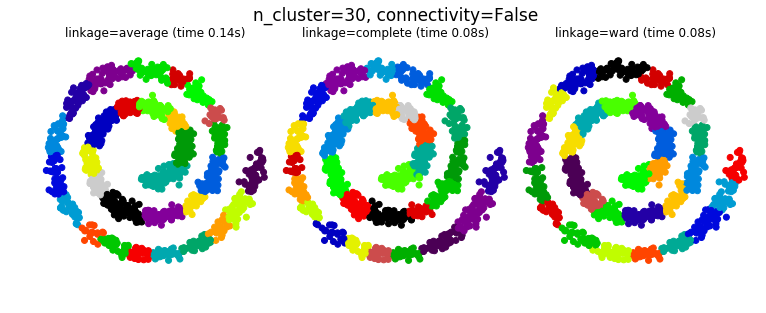

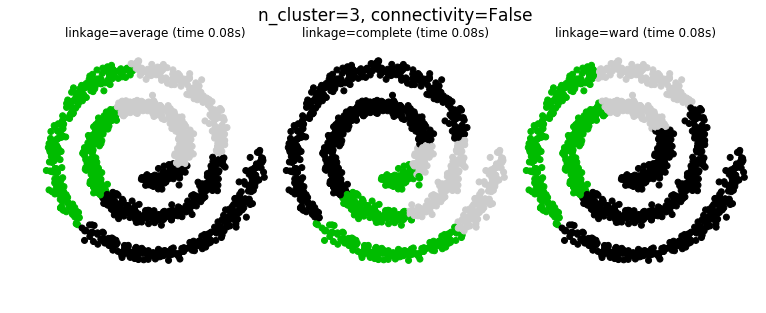

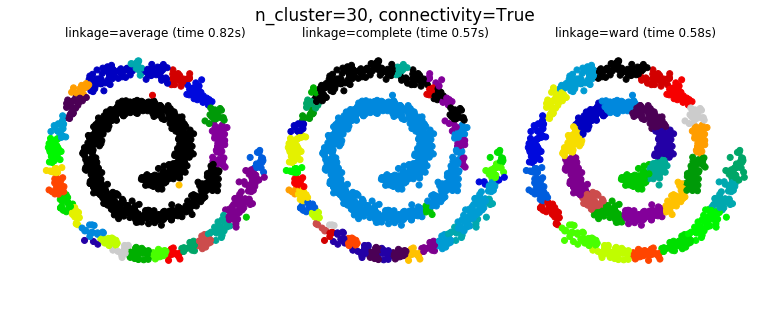

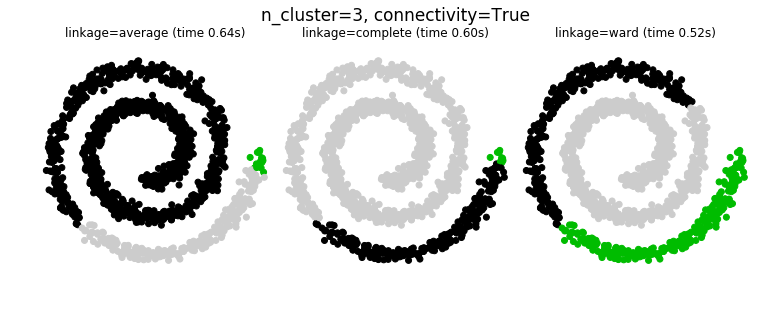

In [2]:
# Authors: Gael Varoquaux, Nelle Varoquaux
# License: BSD 3 clause

import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# Generate sample data
n_samples = 1500
np.random.seed(0)
t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)


X = np.concatenate((x, y))
X += .7 * np.random.randn(2, n_samples)
X = X.T

# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data
knn_graph = kneighbors_graph(X, 30, include_self=False)

for connectivity in (None, knn_graph):
    for n_clusters in (30, 3):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(('average', 'complete', 'ward')):
            plt.subplot(1, 3, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            n_clusters=n_clusters)
            t0 = time.time()
            model.fit(X)
            elapsed_time = time.time() - t0
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_,
                        cmap=plt.cm.spectral)
            plt.title('linkage=%s (time %.2fs)' % (linkage, elapsed_time),
                      fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' %
                         (n_clusters, connectivity is not None), size=17)


plt.show()